In [1]:
from utils import pipeline, plot_learning_curve, plot_confusion_matrix

In [2]:
CONFIG = dict(
    model="BiLSTM-CRF",                     # 4 options: "RNN", "LSTM", "GRU", "BiLSTM-CRF"
    dataset="ATE",                   # 2 options: "NER", "ATE"
    embedding="FastText",            # 3 options: "Word2Vec", "GloVe", "FastText"       => 4*3*2 = 24 models
    batch_size=128,
    epochs=30,
    lr=5e-3,
    criterion="crossentropyloss",
    optimizer="Adam",
    hyperparams=dict(
        input_size=300,
        hidden_size=128,
        num_layers=2
    ),
    early_stopping_patience=1,
    device="cpu",
    verbose=True,
    CRF=True
)

In [3]:
# KEYS: "model", "encoder", "train_loader", "test_loader", "val_loader", "accuracy", "precision", "recall", "f1", "cf", and "loss"
run = pipeline(CONFIG)

CRF: True
Loading Word Embeddings...
Preprocessing Data...
<bound method BiLSTM_CRF.loss of BiLSTM_CRF(
  (embedding): Embedding(2000001, 300)
  (bilstm): LSTM(300, 128, num_layers=2, batch_first=True, bidirectional=True)
  (projector): Linear(in_features=256, out_features=5, bias=True)
)>


 63%|█████████▌     | 19/30 [01:15<00:43,  4.00s/it, [Train: Loss: 1.86586, F1-Score: 0.80433], [Validation: Loss: 2.58938, F1-Score: 0.76660]] 



Early Stopping at Epoch 19.
TEST TRUE != 2: 1
TEST PRED != 2: 2.0
Test Loss: 2.72320
Accuracy: 0.98042, Precision: 0.74200, Recall: 0.84333, F1-Score: 0.78622


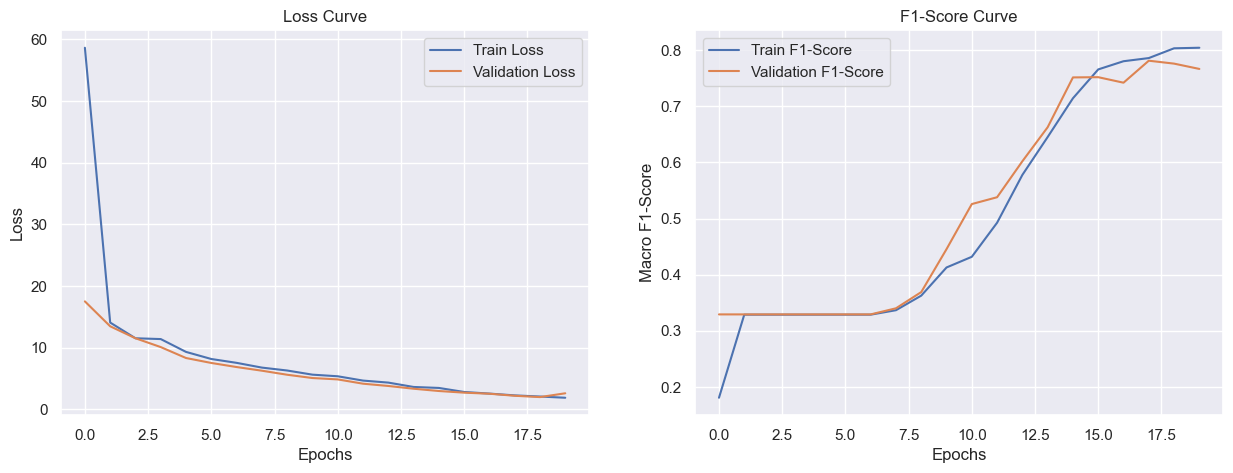

In [4]:
plot_learning_curve(run["model"])

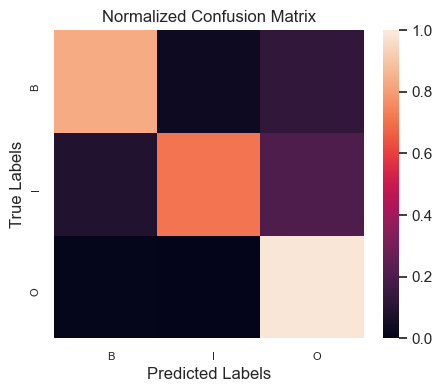

In [5]:
plot_size = (7, 6) if CONFIG["dataset"] == "NER" else (5, 4)
plot_confusion_matrix(run["cf"], labels=run["encoder"].classes_, size=plot_size)